In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
size = 100
w = random.randint(1,10)
b = random.randint(1,100)

x = np.arange(size)
y = w * x + b + np.random.normal(scale=10, size=size)
print("w=%d, b=%d"%(w,b))

w=2, b=17


In [7]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

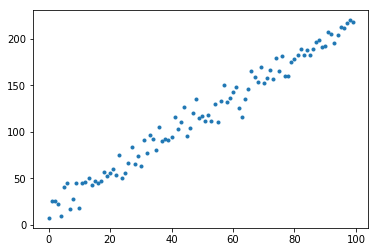

In [4]:
plt.plot(x, y, '.')

In [11]:
# 计算损失函数
def cal_loss(X, w, b, y):
    m = X.shape[0]
    return 2./m * np.sum((X.dot(w) + b - y)**2)
# 数值法求dw,db  d是Derivative导数的缩写
def partial_w(X,w,b,y,h=1e-10):
    #partial 偏的, 是偏导数么?
    return (cal_loss(X,w+h,b,y)-cal_loss(X,w-h,b,y))/(2*h)
    # (往上走一点点的损失 - 往下走一点点的损失)/2个一点点 - 数值法的导数公式就是这样. 
def partial_b(X,w,b,y,h=1e-10):
    return (cal_loss(X,w,b+h,y)-cal_loss(X,w,b-h,y))/(2*h)

In [12]:
# 数据归一化
def normalize(data):
    data_mean, data_std = np.mean(data), np.std(data)
    new_data = 1. * (data-data_mean)/data_std
    return new_data

In [20]:

# 梯度下降函数
def grad_desc(X,y,alpha=0.001, tol=1e-8, max_iter=1000000):
    m = X.shape
    w = np.random.random()
    b = np.random.random()
    
    loss = cal_loss(X,w,b,y)
    print ('initial loss:',loss)
    #保存所有 loss 值
    loss_list = [loss]
    
    iter_no = 1
    while True:
#        #解析解
#        1=x.dot(w)+b-y
#        dw = 1./m * np.sum(2*1*X, axis=0).reshape(n,1)
#        db = 1./m * np.sum(2*(X.dot(w)+b-y))
#        #数值解
        dw = partial_w(X,w,b,y)
        db = partial_b(X,w,b,y)
        w -= alpha*dw
        b -= alpha*db
        new_loss = cal_loss(X,w,b,y)
        loss_list.append(new_loss)
        
        # 每迭代1000次, 输出结果
        if iter_no % 1000 ==0:
            print ('After %d iteration, loss: %f' % (iter_no, new_loss),)
            print ('dw:',dw, 'db:',db,'w:',w,'b:',b)
        # 当 loss 不再下降时,终止迭代
        if abs(new_loss - loss) < tol:
            print ("find best w and b, w: ", w, ', b:',b)
            return w,b,loss_list, iter_no
        loss = new_loss
        # 超过最大迭代次数时, 终止迭代, 检查参数
        if iter_no == max_iter:
            print ("Exceed max iteration, please check your parameters.")
            return
        iter_no +=1

In [27]:
# 生成添加噪声的数据
size = 50
X = np.arange(size).reshape((-1,1))
y = X* 10 + 5 + np.random.normal(scale=1., size=(size, 1))
X_norm = normalize(X)

In [28]:

w,b,loss_list,iter_no = grad_desc(X,y,alpha=0.0002)

initial loss: 135342.499074
After 1000 iteration, loss: 11.391004
dw: 0.130917499064 db: -4.31889191077 w: 10.1032360998 b: 1.36855883348
After 2000 iteration, loss: 8.331379
dw: 0.106563646796 db: -3.51521478592 w: 10.0795747958 b: 2.14913326169
After 3000 iteration, loss: 6.304507
dw: 0.0867128591153 db: -2.86108470249 w: 10.0603164808 b: 2.78445533131
After 4000 iteration, loss: 4.961789
dw: 0.0705879799057 db: -2.32869279415 w: 10.0446418175 b: 3.30155446637
After 5000 iteration, loss: 4.072295
dw: 0.0574518210783 db: -1.89535942496 w: 10.0318839543 b: 3.72242991109
After 6000 iteration, loss: 3.483072
dw: 0.0467492711209 db: -1.54269708119 w: 10.0215006658 b: 4.06496958283
After 7000 iteration, loss: 3.092729
dw: 0.0380562248381 db: -1.25564447728 w: 10.0130494519 b: 4.34377051495
After 8000 iteration, loss: 2.834139
dw: 0.0310218517541 db: -1.02200248264 w: 10.0061708378 b: 4.57069264714
After 9000 iteration, loss: 2.662832
dw: 0.0252664555944 db: -0.831679169977 w: 10.0005721918

In [29]:
w,b,loss_list,iter_no = grad_desc(X_norm,y,alpha=0.0002)

initial loss: 165660.44018
After 1000 iteration, loss: 33426.594592
dw: -258.842192125 db: -448.053469881 w: 79.3015372597 b: 138.035548292
After 2000 iteration, loss: 6747.212600
dw: -116.256160254 db: -201.280272449 w: 114.918700381 b: 199.689740288
After 3000 iteration, loss: 1363.437697
dw: -52.2231857758 db: -90.424236987 w: 130.916847927 b: 227.38662405
After 4000 iteration, loss: 277.009089
dw: -23.4592789639 db: -40.6208755521 w: 138.102579688 b: 239.828898333
After 5000 iteration, loss: 57.759566
dw: -10.5386988025 db: -18.2482295941 w: 141.330631768 b: 245.418338994
After 6000 iteration, loss: 13.513395
dw: -4.73400874057 db: -8.19763812387 w: 142.780767697 b: 247.929282288
After 7000 iteration, loss: 4.584183
dw: -2.12684980738 db: -3.68262309536 w: 143.432213366 b: 249.057272982
After 8000 iteration, loss: 2.782204
dw: -0.955286960647 db: -1.65434110855 w: 143.724861349 b: 249.564000029
After 9000 iteration, loss: 2.418551
dw: -0.429174473737 db: -0.743178851792 w: 143.8563